In [1]:
import scipy as sp
%matplotlib inline
from matplotlib import pyplot as plt
from glob import glob

7 de septiembre
==

Pines de adaptador SOIC28 (según mail Sebas)
===

* 7 GND
* 8 Out4
* 21 Out40
* 22 Vdd
* 23 /RST

Medición
===

Fuente en 5V, limito en 10mA. Pullup de 10kOhm en /RST, pulsador a GND 

RST se queda en .8V, baja a 0 cuando aprieto el pulsador. Pero no debería fluir corriente, y el pullup debería llevarlo a 5V. Quizás voló un diodo de protección?

Me olvidé de polarizar la salida y poner todo en oscuridad.

Polaricé OUT4 con 5.6kOhm a 5V. Se queda en .75V, llendo a 0 cuando tengo apretado reset. La tensión en /RST va a 0, y cuando suelto pasa brevemente por 5V y luego se queda en 2.12V

##### 8 de septiembre ==  Pinouts revisados ===  <img src="files/figuras/aps/pinout1.svg" width="400"><img src="files/figuras/aps/pinout2.svg" width="400">  No tengo que usar el segundo sino el primero, que tiene la gota de resina.  <img src="files/figuras/aps/pinout1aps.png" width="400">

Ambas salidas se quedan en 3.9V y bajan a 1.4V al apretar reset. Acercar la lámpara no cambia nada. Lo dejo desde 17:51 a ver si descarga el OUT40. 

18:01 sigue en 3.9V. Además, el reset no debería llevarlo a tensión menor sino al extremo superior. Quizás hay pérdidas del nodo /RST al nodo de alta impedancia, pero cuando estoy reseteando el transistor de reset debería ganarle a cualquier pérdida razonable.

[1]L. H. C. Braga, S. Domingues, M. F. Rocha, L. B. Sá, F. S. Campos, F. V. Santos, A. C. Mesquita, M. V. Silva, y J. W. Swart, «Layout techniques for radiation hardening of standard CMOS active pixel sensors», Analog Integrated Circuits and Signal Processing, vol. 57, n.º 1-2, pp. 129-139, nov. 2008.

[2]B. Choubey, D. Joseph, S. Aoyama, y S. Collins, «Dark current reduction techniques for wide dynamic range logarithmic CMOS pixels», en 30th International Congress of Imaging Science, 2006.



11 de septiembre
==

Voy a mandar pulsos de reset con el HP8112 para ver bien qué está haciendo en los flancos.

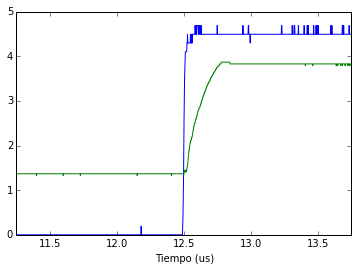

In [3]:
tiempo, out40, rst = sp.loadtxt('../lantz/mediciones/2015-09-11_15.04.35 osc.txt', unpack=True)
tiempo *= 1e6
plt.plot(tiempo, rst)
plt.plot(tiempo, out40)
plt.xlim((tiempo[-1]*.45, tiempo[-1]*.55))
plt.xlabel('Tiempo (us)')

El tiempo de subida es parecido a la fracción de us que calculamos en el paper del APS.

La bajada explica todo:

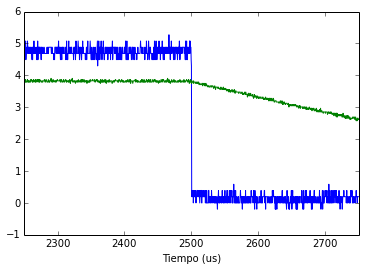

In [4]:
tiempo, out40, rst = sp.loadtxt('../lantz/mediciones/2015-09-11_15.12.50 osc.txt', unpack=True)
tiempo *= 1e6
plt.plot(tiempo, rst)
plt.plot(tiempo, out40)
plt.xlim((tiempo[-1]*.45, tiempo[-1]*.55))
plt.xlabel('Tiempo (us)')

La curva de descarga varía entre trazas por la iluminación de los tubos (con la lamparita baja constante). Anda.

Soy un nabo, casi seguro que Mariano le puso un inversor a /RST y ahora es active high.

Ahora hay que medir la descarga. Armé una caja para poner el die en oscuridad y sacar los cables.

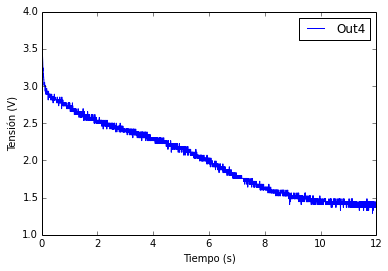

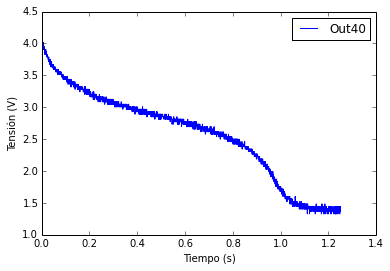

In [5]:
datos = sp.loadtxt('../lantz/mediciones/2015-09-11_17.29.52 osc.txt')
datos[:,0] -= datos[datos[:,2] > 2.5,0][-1]
#tiempo *= 1e6
datos = datos[(datos[:,0] >= 0) * (datos[:,0] < 12)]
tiempo, out4, rst = datos.T
#plt.plot(tiempo, rst, label='Reset')
plt.plot(tiempo, out4, label='Out4')
#plt.xlim((tiempo[-1]*.45, tiempo[-1]*.55))
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.figure()
datos = sp.loadtxt('../lantz/mediciones/2015-09-11_17.31.54 osc.txt')
datos[:,0] -= datos[datos[:,2] > 2.5,0][-1]
#tiempo *= 1e6
datos = datos[(datos[:,0] >= 0) * (datos[:,0] < 1.25)]
tiempo, out40, rst = datos.T
#tiempo *= 1e6
#plt.plot(tiempo, rst, label='Reset')
plt.plot(tiempo, out40, label='Out40')
#plt.xlim((tiempo[-1]*.45, tiempo[-1]*.55))
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.legend()

Cubriendo la caja con un buzo y apagando todas las luces

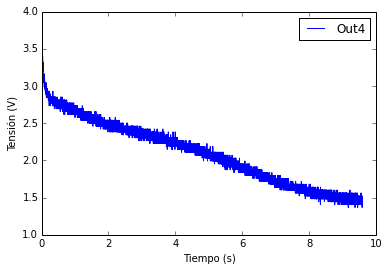

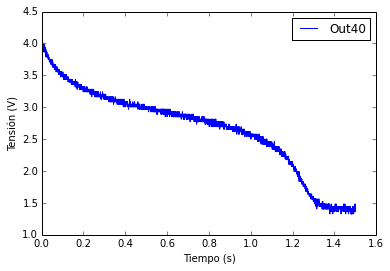

In [6]:
datos = sp.loadtxt('../lantz/mediciones/2015-09-11_18.02.18 osc.txt')
datos[:,0] -= datos[datos[:,2] > 2.5,0][-1]
datos = datos[(datos[:,0] >= 0)]
tiempo, out4, rst = datos.T
#tiempo *= 1e6
#plt.plot(tiempo, rst, label='Reset')
plt.plot(tiempo, out4, label='Out4')
#plt.xlim((tiempo[-1]*.45, tiempo[-1]*.55))
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.figure()
datos = sp.loadtxt('../lantz/mediciones/2015-09-11_17.51.47 osc.txt')
datos[:,0] -= datos[datos[:,2] > 2.5,0][-1]
datos = datos[(datos[:,0] >= 0) * (datos[:,0] < 1.5)]
tiempo, out40, rst = datos.T
#tiempo *= 1e6
#plt.plot(tiempo, rst, label='Reset')
plt.plot(tiempo, out40, label='Out40')
#plt.xlim((tiempo[-1]*.45, tiempo[-1]*.55))
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.legend()

El de área chica se ve más ruidoso porque usé mayor sample rate en el osciloscopio.

16 de septiembre
==

Fijé un LED al lado del die, mido curvas de descarga a distintas corrientes.

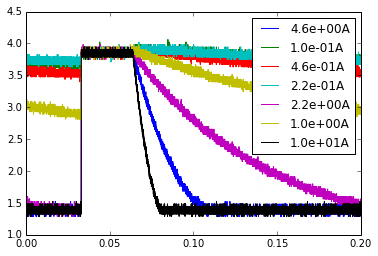

In [7]:

for fname in glob('../lantz/mediciones/aps/prueba00/*.txt'):
    fd = open(fname, 'r')
    fd.readline()
    header = fd.readline()
    datos = sp.loadtxt(fname)
    plt.plot(datos[:,0], datos[:,1], label='{:.1e}A'.format(float(header.split(' ')[2])))
plt.legend()

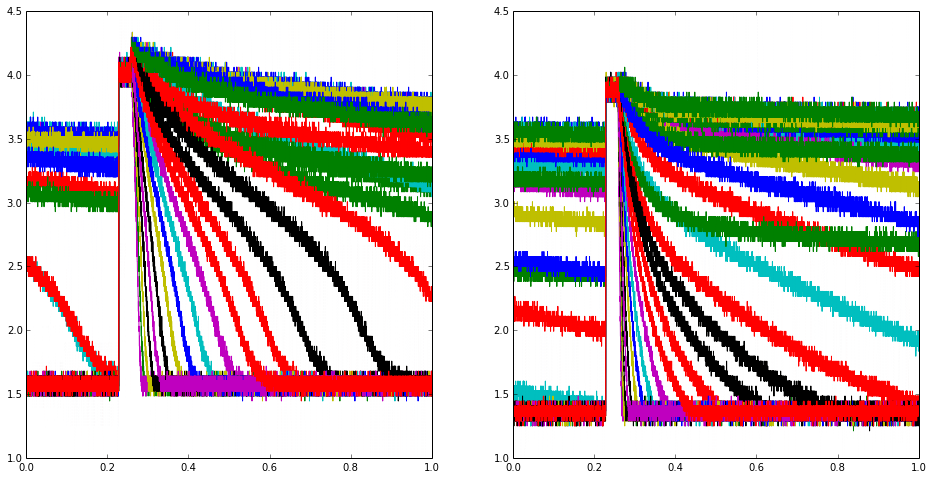

In [8]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for fname in glob('../lantz/mediciones/aps/prueba02/*.txt'):
    fd = open(fname, 'r')
    fd.readline()
    header = fd.readline()
    datos = sp.loadtxt(fname)
    ax1.plot(datos[:,0], datos[:,1], label='{:.1e}A'.format(float(header.split(' ')[2])))
    ax2.plot(datos[:,0], datos[:,2], label='{:.1e}A'.format(float(header.split(' ')[2])))

Promedio 10 curvas para bajar el ruido

(0, 0.0005)

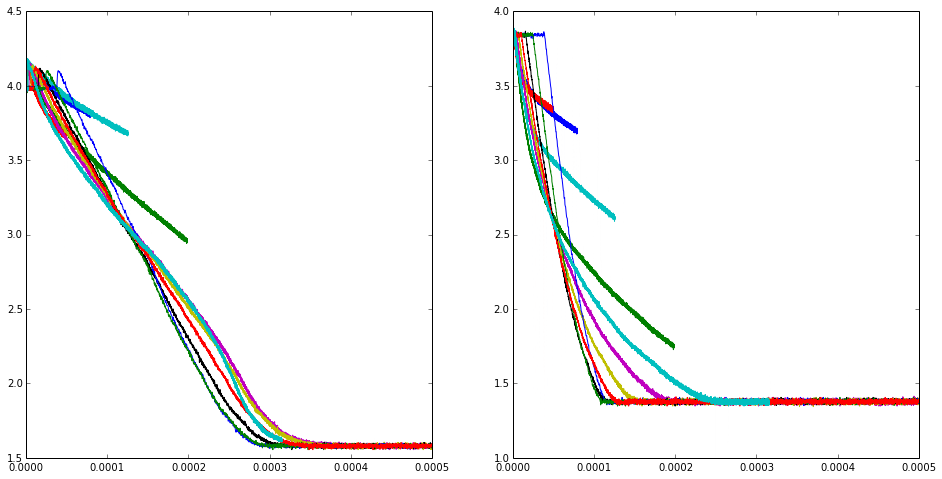

In [21]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for fname in glob('../lantz/mediciones/aps/prueba10/*.txt'):
    fd = open(fname, 'r')
    fd.readline()
    header = fd.readline()
    datos = sp.loadtxt(fname)
    datos = sp.mean(datos.transpose().reshape((3, 10, datos.shape[0]/10)), axis=1)
    corriente = float(header.split(' ')[2])
    ax1.plot(datos[0,:]*corriente, datos[1,:], label='{:.1e}A'.format(corriente))
    ax2.plot(datos[0,:]*corriente, datos[2,:], label='{:.1e}A'.format(corriente))
ax1.set_xlim((0, .5e-3))
ax2.set_xlim((0, .5e-3))

18 de septiembre
==

El programa de medición alarga el tiempo de captura para corrientes chicas

(0, 0.0005)

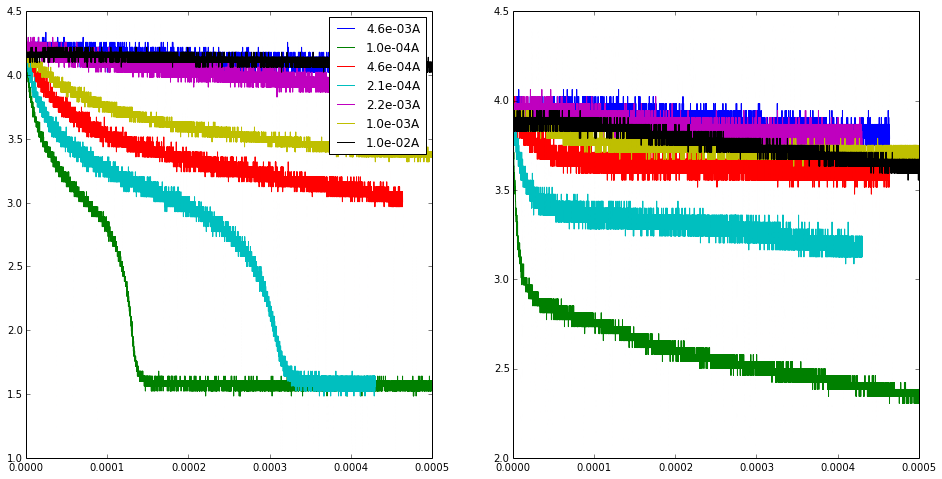

In [18]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for fname in glob('../lantz/mediciones/aps/prueba11/*.txt'):
    fd = open(fname, 'r')
    fd.readline()
    header = fd.readline()
    datos = sp.loadtxt(fname).transpose()
    corriente = float(header.split(' ')[2])
    ax1.plot(datos[0,:]*corriente, datos[1,:], label='{:.1e}A'.format(corriente))
    ax2.plot(datos[0,:]*corriente, datos[2,:], label='{:.1e}A'.format(corriente))
ax1.set_xlim((0, .5e-3))
ax1.legend()
ax2.set_xlim((0, .5e-3))

(0, 0.0016)

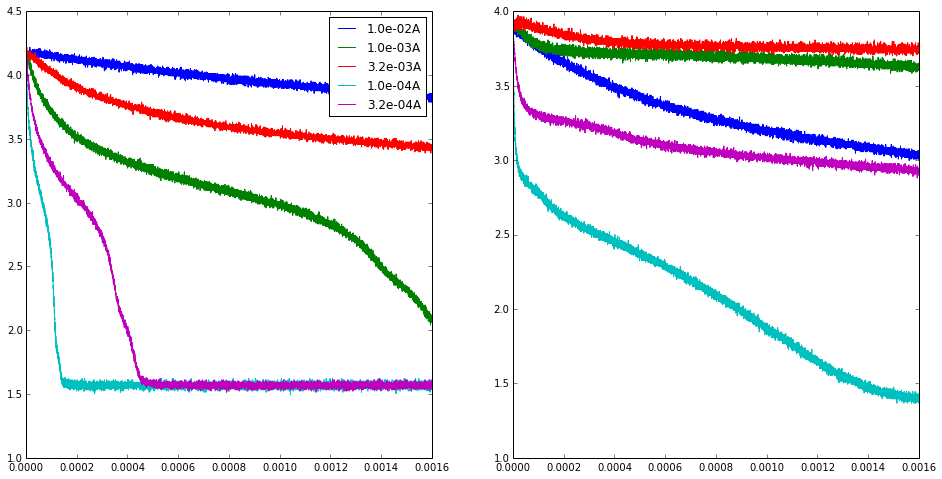

In [20]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for fname in glob('../lantz/mediciones/aps/prueba12/*.txt'):
    fd = open(fname, 'r')
    fd.readline()
    header = fd.readline()
    datos = sp.loadtxt(fname)
    datos = sp.mean(datos.transpose().reshape((3, 4, datos.shape[0]/4)), axis=1)
    corriente = float(header.split(' ')[2])
    ax1.plot(datos[0,:]*corriente, datos[1,:], label='{:.1e}A'.format(corriente))
    ax2.plot(datos[0,:]*corriente, datos[2,:], label='{:.1e}A'.format(corriente))
ax1.set_xlim((0, 1.6e-3))
ax1.legend()
ax2.set_xlim((0, 1.6e-3))

(0, 0.016)

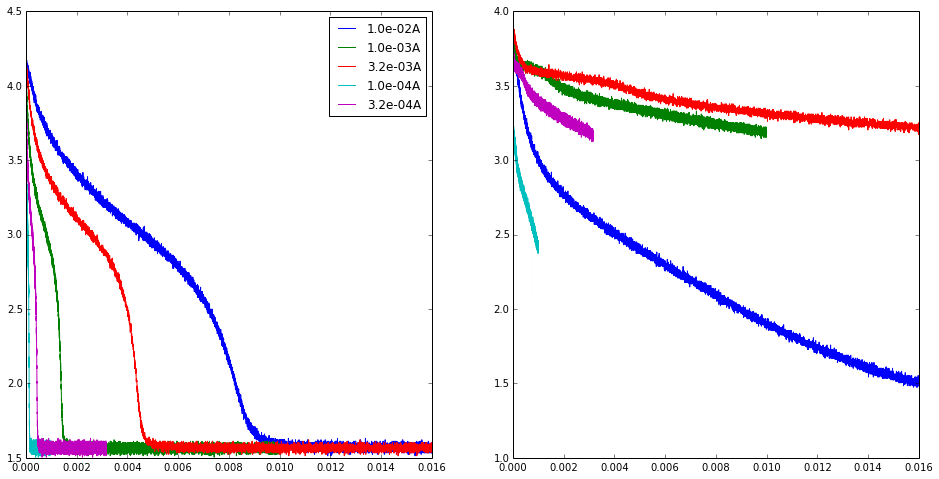

In [23]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for fname in glob('../lantz/mediciones/aps/prueba14/*.txt'):
    fd = open(fname, 'r')
    fd.readline()
    header = fd.readline()
    datos = sp.loadtxt(fname)
    datos = sp.mean(datos.transpose().reshape((3, 4, datos.shape[0]/4)), axis=1)
    corriente = float(header.split(' ')[2])
    ax1.plot(datos[0,:]*corriente, datos[1,:], label='{:.1e}A'.format(corriente))
    ax2.plot(datos[0,:]*corriente, datos[2,:], label='{:.1e}A'.format(corriente))
ax1.set_xlim((0, 16e-3))
ax1.legend()
ax2.set_xlim((0, 16e-3))

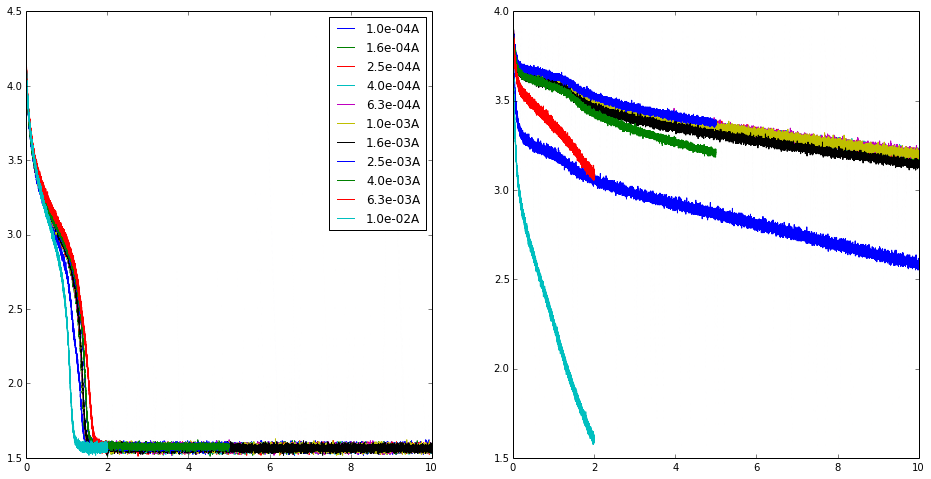

In [37]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
archivos = sorted(glob('../lantz/mediciones/aps/prueba15/*.txt'))
corrientes = sp.empty(len(archivos))
for ii, fname in enumerate(archivos):
    fd = open(fname, 'r')
    fd.readline()
    header = fd.readline()
    datos = sp.loadtxt(fname)
    datos = sp.mean(datos.transpose().reshape((3, 6, datos.shape[0]/6)), axis=1)
    if ii == 0:
        tensiones = sp.linspace(min(datos[1,:]), max(datos[1,:]), 7)[1:-1]
        tiempos = sp.empty((len(archivos), len(tensiones)))
    orden = sp.argsort(datos[1,:])
    tiempos[ii,:] = sp.interp(tensiones, datos[1,orden], datos[0,orden])
    corrientes[ii] = float(header.split(' ')[2])
    ax1.plot(datos[0,:], datos[1,:], label='{:.1e}A'.format(corrientes[ii]))
    ax2.plot(datos[0,:], datos[2,:], label='{:.1e}A'.format(corrientes[ii]))
#ax1.set_xlim((0, 12e-3))
ax1.legend()
#ax2.set_xlim((0, 12e-3))

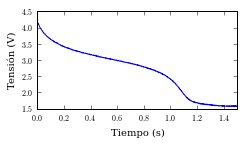

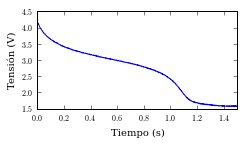

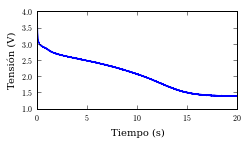

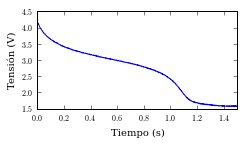

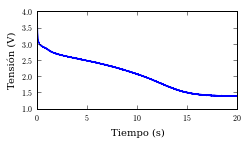

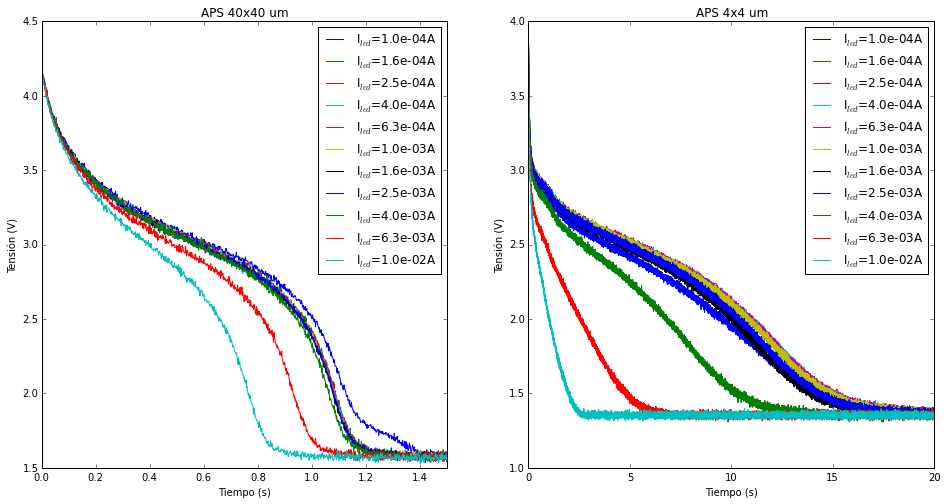

In [5]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
archivos = sorted(glob('../lantz/mediciones/aps/prueba16/*.txt'))
corrientes = sp.empty(len(archivos))
tensiones  = sp.linspace(1.5,2.5,5)
tiempos = sp.empty((len(archivos), len(tensiones)))
for ii, fname in enumerate(archivos):
    fd = open(fname, 'r')
    fd.readline()
    header = fd.readline()
    datos = sp.loadtxt(fname)
    datos = sp.mean(datos.transpose().reshape((3, 6, datos.shape[0]/6)), axis=1)
    #if ii == 0:
        #tensiones = sp.linspace(min(datos[2,:]), max(datos[2,:]), 7)[1:-1]
    orden = sp.argsort(datos[1,:])
    tiempos[ii,:] = sp.interp(tensiones, datos[2,orden], datos[0,orden])
    corrientes[ii] = float(header.split(' ')[2])
    ax1.plot(datos[0,:], datos[1,:], label='I$_{{led}}$={:.1e}A'.format(corrientes[ii]))
    ax2.plot(datos[0,:], datos[2,:], label='I$_{{led}}$={:.1e}A'.format(corrientes[ii]))
ax1.set_xlim((0, 1.5))
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Tensión (V)')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Tensión (V)')
ax1.legend()
ax1.set_title('APS 40x40 um')
ax2.set_title('APS 4x4 um')
ax2.legend()
#ax2.set_xlim((0, 12e-3))

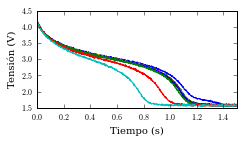

In [9]:
with plt.rc_context(fname='../matplotlib.printrc'):
    fig = plt.figure()
    #ax1 = fig.add_subplot(1,2,1)
    #ax2 = fig.add_subplot(1,2,2)
    archivos = sorted(glob('../lantz/mediciones/aps/prueba16/*.txt'))
    corrientes = sp.empty(len(archivos))
    tensiones  = sp.linspace(1.5,2.5,5)
    tiempos = sp.empty((len(archivos), len(tensiones)))
    for ii, fname in enumerate(archivos):
        fd = open(fname, 'r')
        fd.readline()
        header = fd.readline()
        datos = sp.loadtxt(fname)
        datos = sp.mean(datos.transpose().reshape((3, 6, datos.shape[0]/6)), axis=1)
        #if ii == 0:
            #tensiones = sp.linspace(min(datos[2,:]), max(datos[2,:]), 7)[1:-1]
        orden = sp.argsort(datos[1,:])
        tiempos[ii,:] = sp.interp(tensiones, datos[2,orden], datos[0,orden])
        corrientes[ii] = float(header.split(' ')[2])
        plt.plot(datos[0,:], datos[1,:], label='I$_{{led}}$={:.1e}A'.format(corrientes[ii]))
        #ax2.plot(datos[0,:], datos[2,:], label='I$_{{led}}$={:.1e}A'.format(corrientes[ii]))
    plt.xlim((0, 1.5))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Tensión (V)')
    #plt.legend()
    #ax1.legend()
    plt.savefig('figuras/aps/descarga_led_40.pdf')
    #ax2.set_title('APS 4x4 um')
    #ax2.legend()
    #ax2.set_xlim((0, 12e-3))

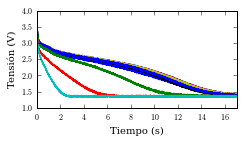

In [10]:
with plt.rc_context(fname='../matplotlib.printrc'):
    fig = plt.figure()
    #ax1 = fig.add_subplot(1,2,1)
    #ax2 = fig.add_subplot(1,2,2)
    archivos = sorted(glob('../lantz/mediciones/aps/prueba16/*.txt'))
    corrientes = sp.empty(len(archivos))
    tensiones  = sp.linspace(1.5,2.5,5)
    tiempos = sp.empty((len(archivos), len(tensiones)))
    for ii, fname in enumerate(archivos):
        fd = open(fname, 'r')
        fd.readline()
        header = fd.readline()
        datos = sp.loadtxt(fname)
        datos = sp.mean(datos.transpose().reshape((3, 6, datos.shape[0]/6)), axis=1)
        #if ii == 0:
            #tensiones = sp.linspace(min(datos[2,:]), max(datos[2,:]), 7)[1:-1]
        orden = sp.argsort(datos[1,:])
        tiempos[ii,:] = sp.interp(tensiones, datos[2,orden], datos[0,orden])
        corrientes[ii] = float(header.split(' ')[2])
        #plt.plot(datos[0,:], datos[1,:], label='I$_{{led}}$={:.1e}A'.format(corrientes[ii]))
        plt.plot(datos[0,:], datos[2,:], label='I$_{{led}}$={:.1e}A'.format(corrientes[ii]))
    #plt.xlim((0, 1.5))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Tensión (V)')
    #plt.legend()
    #ax1.legend()
    #ax2.set_title('APS 4x4 um')
    #ax2.legend()
    plt.xlim((0, 17))
    plt.savefig('figuras/aps/descarga_led_4.pdf')

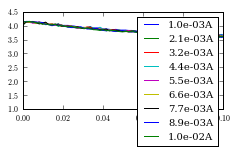

In [6]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
archivos = sorted(glob('../lantz/mediciones/aps/prueba19/*.txt'))
corrientes = sp.empty(len(archivos))
tensiones  = sp.array([sp.linspace(1.75,3.75,10)[::-1], sp.linspace(1.5,3,10)[::-1]])
tiempos = sp.empty((len(archivos), len(tensiones[0]),2))
for ii, fname in enumerate(archivos):
    fd = open(fname, 'r')
    fd.readline()
    header = fd.readline()
    datos = sp.loadtxt(fname)
    datos = sp.mean(datos.transpose().reshape((3, 3, datos.shape[0]/3)), axis=1)
    #if ii == 0:
        #tensiones = sp.linspace(min(datos[2,:]), max(datos[2,:]), 7)[1:-1]
    orden = sp.argsort(datos[1,:])
    tiempos[ii,:,0] = sp.interp(tensiones[0,:], datos[1,orden], datos[0,orden])
    tiempos[ii,:,1] = sp.interp(tensiones[1,:], datos[2,orden], datos[0,orden])
    corrientes[ii] = float(header.split(' ')[2])
    ax1.plot(datos[0,:], datos[1,:], label='{:.1e}A'.format(corrientes[ii]))
    ax2.plot(datos[0,:], datos[2,:], label='{:.1e}A'.format(corrientes[ii]))
ax1.set_xlim((0, .1))
ax1.legend()
ax2.set_xlim((0,.1))
#ax2.set_xlim((0, 12e-3))

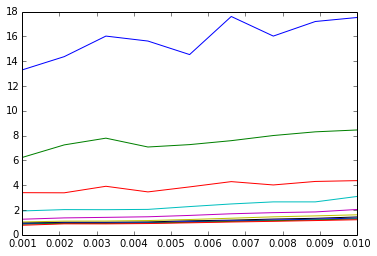

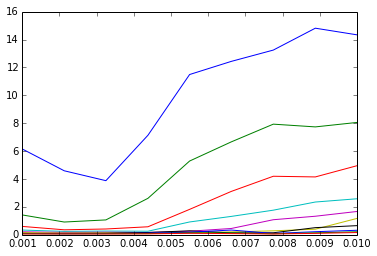

In [64]:
plt.plot(corrientes, 1 / tiempos[:,:,0])
plt.figure()
plt.plot(corrientes, 1 / tiempos[:,:,1])

Hay cierta linealidad entre tiempo de descarga y corriente para el de área 4,. En el otro oscila de manera confusa.

Mido la variación entre muchas curvas en oscuridad

Tiro 20-21 porque me olvidé el osc en average

In [4]:
datos = sp.loadtxt('../lantz/mediciones/aps/prueba22/000 0.00e+00A.txt').transpose()
datos = datos.reshape((3, 16, datos.shape[1]/16))
oscuridad = sp.mean(datos[1:3,:,:], axis=1)
std = sp.std(datos[1:3,:,:], axis=1)
with plt.rc_context(fname='../matplotlib.printrc'):
    plt.figure()
    plt.plot(datos[0,0,:], oscuridad[0,:])
    plt.xlim((0,1.5))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Tensión (V)')
    plt.savefig('figuras/aps/oscuridad4.pdf')
    plt.figure()
    plt.plot(datos[0,0,:], oscuridad[1,:])
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Tensión (V)')
    plt.savefig('figuras/aps/oscuridad40.pdf')
#ax2.plot(datos[0,0,:], oscuridad[1,:])
#fig = plt.figure(figsize=(16,8))
#ax1 = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2)
#ax1.plot(datos[0,0,:], std[0,:])
#ax2.plot(datos[0,0,:], std[1,:])

Tensiones luego del reset:

In [99]:
oscuridad[:,0]

array([ 4.04907227,  3.85986328])

30 de septiembre
==

Circuito de reset
--

Cuando la salida del APS baja de cierto valor, manda un pulso de reset.

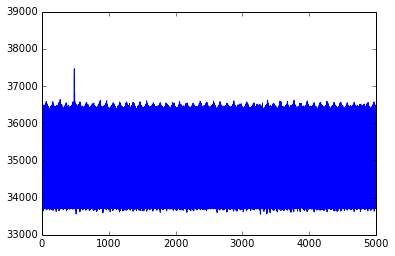

In [9]:
datos = sp.loadtxt('../lantz/programas/00000000.txt', dtype=int)
plt.plot(datos)

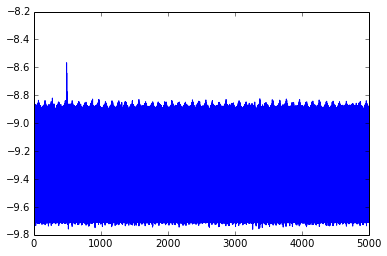

In [10]:
resolution = 16
datos ^= 1<<(resolution-1)
datos &= (1 << resolution) - 1
plt.plot(datos[::] * 20 / (1<<resolution) - 10)

Estaba restando erroneamente el LOW del rango de entrada.

6 de Octubre
==

Si conecto la tierra del laboratorio (ya sea directo o a través del Low del 220) mete mucho ruido.

Midiendo de forma diferencial y poniendo en corto las entradas, tengo 1mV de ruido. Pero cuando cambia una salida digital a veces mete un pico enorme en esa entrada analógica.

![](figuras/crosstalk.png)

8 de octubre
==

Medición de ruido en ambos canales

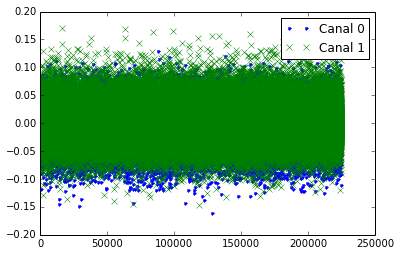

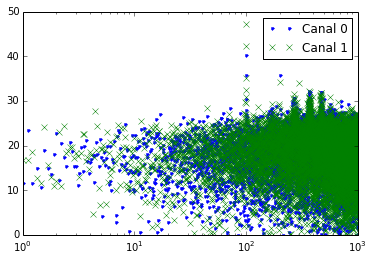

In [25]:
datos = sp.loadtxt('ruidokusb.txt')
datos -= sp.mean(datos, axis=0)
plt.plot(datos[:,0], '.', label='Canal 0')
plt.plot(datos[:,1], 'x', label='Canal 1')
plt.legend()
plt.figure()
freq = 25000/datos.shape[0]*sp.arange(datos.shape[0])
plt.semilogx(freq,20*sp.log10(abs(sp.fft(datos[:,0]))), '.', label='Canal 0')
plt.semilogx(freq,20*sp.log10(abs(sp.fft(datos[:,1]))), 'x', label='Canal 1')
plt.ylim((-0,50))
plt.xlim((1, 1e3))
plt.legend()

Apagando la luz no cambia mucho

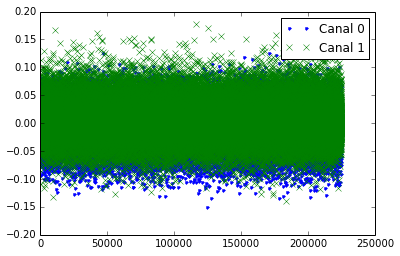

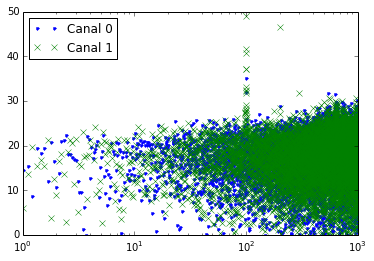

In [26]:
datos = sp.loadtxt('ruidokusb_sinluz.txt')
datos -= sp.mean(datos, axis=0)
plt.plot(datos[:,0], '.', label='Canal 0')
plt.plot(datos[:,1], 'x', label='Canal 1')
plt.legend()
plt.figure()
freq = 25000/datos.shape[0]*sp.arange(datos.shape[0])
plt.semilogx(freq,20*sp.log10(abs(sp.fft(datos[:,0]))), '.', label='Canal 0')
plt.semilogx(freq,20*sp.log10(abs(sp.fft(datos[:,1]))), 'x', label='Canal 1')
plt.ylim((-0,50))
plt.xlim((1, 1e3))
plt.legend(loc='upper left')

Miro el ruido en la alimentación (alimento con la hy3003D-2 )

(1, 1000.0)

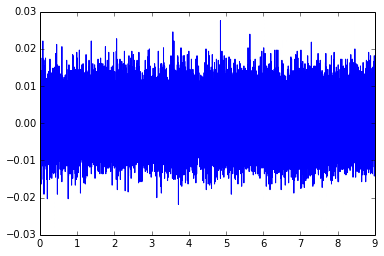

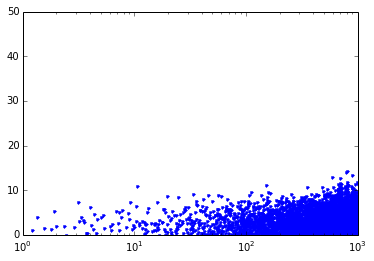

In [28]:
datos = sp.loadtxt('ruidokusb_conluz_midiendovdd.txt')
datos[:,1:] -= sp.mean(datos[:,1:], axis=0)
plt.plot(datos[:,0], datos[:,3])
plt.figure()
freq = 50000/3/datos.shape[0]*sp.arange(datos.shape[0])
plt.semilogx(freq,20*sp.log10(abs(sp.fft(datos[:,3]))), '.', label='Canal 0')
plt.ylim((-0,50))
plt.xlim((1, 1e3))

Pruebo alimentar con la fuente del KUSB

(1, 1000.0)

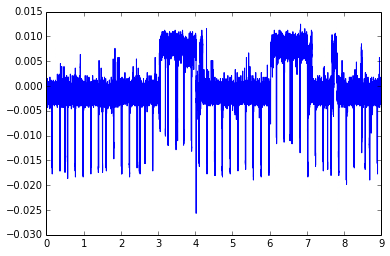

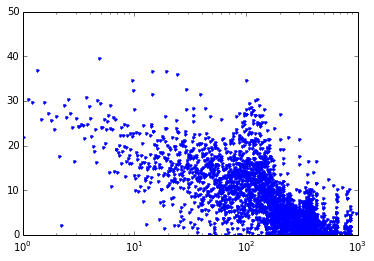

In [29]:
datos = sp.loadtxt('ruidokusb_conluz_midiendovdd_alimentacionkusb.txt')
datos[:,1:] -= sp.mean(datos[:,1:], axis=0)
plt.plot(datos[:,0], datos[:,3])
plt.figure()
freq = 50000/3/datos.shape[0]*sp.arange(datos.shape[0])
plt.semilogx(freq,20*sp.log10(abs(sp.fft(datos[:,3]))), '.', label='Canal 0')
plt.ylim((-0,50))
plt.xlim((1, 1e3))

Así tengo un tiempo de reset muy largo y de descarga muy corto

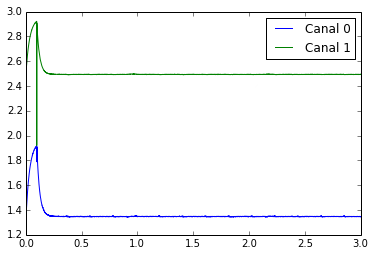

In [30]:
datos = sp.loadtxt('../lantz/mediciones/aps/k000.txt')
plt.plot(datos[:,0], datos[:,1], label='Canal 0')
plt.plot(datos[:,0], datos[:,2], label='Canal 1')
plt.legend()

Con la fuente externa tengo los mismos tiempos chotos y mucho más ruido

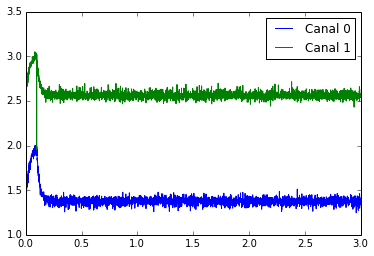

In [31]:
datos = sp.loadtxt('../lantz/mediciones/aps/k001.txt')
plt.plot(datos[:,0], datos[:,1], label='Canal 0')
plt.plot(datos[:,0], datos[:,2], label='Canal 1')
plt.legend()

Voy a probar resetear con los pulsos del timer, a ver si mejora el crosstalk.

Ajusté las conexiones, ahora parece que no descarga.

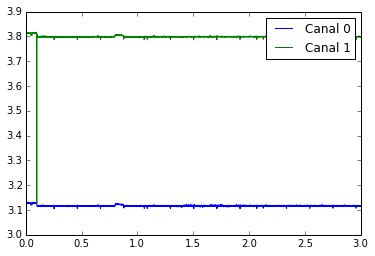

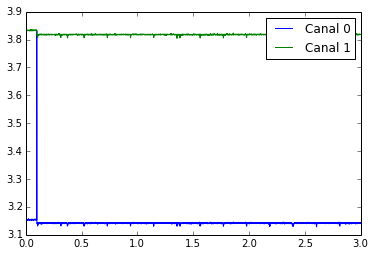

In [32]:
datos = sp.loadtxt('../lantz/mediciones/aps/k002.txt')
plt.plot(datos[:,0], datos[:,1], label='Canal 0')
plt.plot(datos[:,0], datos[:,2], label='Canal 1')
plt.legend()
plt.figure()
datos = sp.loadtxt('../lantz/mediciones/aps/k003.txt')
plt.plot(datos[:,0], datos[:,1], label='Canal 0')
plt.plot(datos[:,0], datos[:,2], label='Canal 1')
plt.legend()

El canal 0 salta al valor del canal 1.

Pruebo hacer andar el contador para generar pulsos

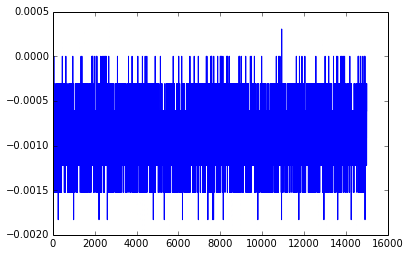

In [3]:
datos = sp.loadtxt('pulsos.txt')
plt.plot(datos[:,1])

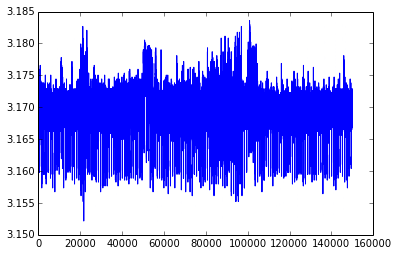

In [5]:
datos = sp.loadtxt('../lantz/mediciones/aps/largo.txt')
plt.plot(datos[:,1])

13 de octubre
==

Puse un regulador de 5V en el protoboard a ver si baja el ruido:

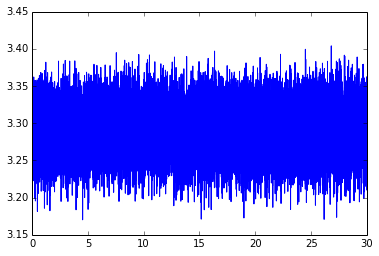

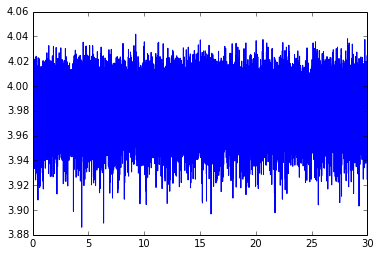

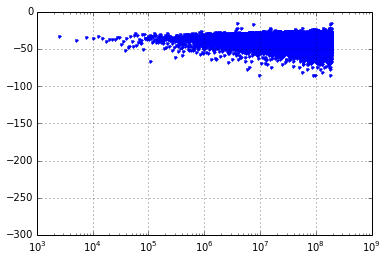

In [19]:
datos = sp.loadtxt('../lantz/mediciones/aps/regulador.txt')
plt.plot(datos[:,0], datos[:,1])
plt.figure()
plt.plot(datos[:,0], datos[:,2])
plt.figure()
dt = datos[1,0] - datos[0,0]
freq = sp.arange(datos.shape[0]) / dt
datos[:,1:] -= sp.mean(datos[:,1:], axis=0)
spec = sp.fft(datos[:,1]) / sp.sqrt(datos.shape[0])
plt.semilogx(freq,20*sp.log10(abs(spec)), '.', label='Canal 0')
#plt.ylim((-0,50))
plt.grid()
#plt.xlim((1, 1e3))

Sigue ruidoso y no sale de reset. Verifiqué las conexiones y que la señal de reset llegue hasta la placa.

In [16]:
sp.sum(spec*sp.conj(spec))

(25.953329694915201+0j)

In [17]:
sp.sum(datos[:,1]**2)

25.953329694915563

30 de Noviembre
==

Pinout del 009
--

* 6: OUT40
* 7: VDD
* 14: RST
* 15: GND
* 16: OUT4
    
Los APS descargan demasiado rápido al sacar reset, aunque están en una caja rodeada por un buzo:

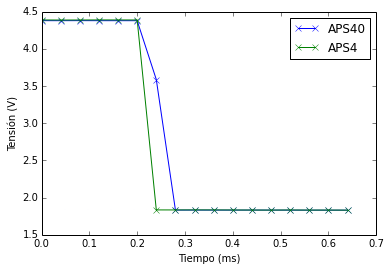

In [15]:
datos = sp.loadtxt('../lantz/mediciones/quickDAQData/aps00.tsv', skiprows=12)
tiempo = sp.arange(datos.shape[0])/25000
plt.plot(tiempo * 1e3, datos[:,0], 'x-', label='APS40')
plt.plot(tiempo * 1e3, datos[:,1], 'x-', label='APS4')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Tensión (V)')
plt.legend()

Quizás se dañaron por tanta radiación.

Con caja arriba:

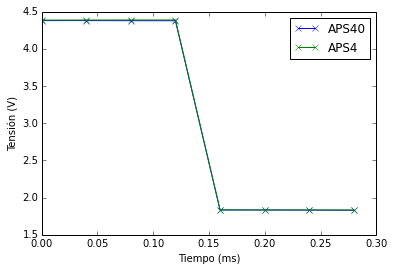

In [16]:
datos = sp.loadtxt('../lantz/mediciones/quickDAQData/aps01.tsv', skiprows=12)
tiempo = sp.arange(datos.shape[0])/25000
plt.plot(tiempo * 1e3, datos[:,0], 'x-', label='APS40')
plt.plot(tiempo * 1e3, datos[:,1], 'x-', label='APS4')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Tensión (V)')
plt.legend()

14 de Diciembre
==

Descarga debería ser lineal:

https://books.google.com.ar/books?id=6Rg7AAAAQBAJ&lpg=PA289&ots=yO1HPv_N4E&dq=reverse%20biased%20diode%20%22discharge%20curve%22&hl=es&pg=PA290#v=onepage&q=reverse%20biased%20diode%20%22discharge%20curve%22&f=false

Quizás los seguidores le dan esa forma a la salida.

9 de Febrero
==

Ruido mediciones APS
--

In [3]:
diff = sp.diff(datos[:,2])
diff = diff[diff < 1.] / sp.sqrt(10)
with plt.rc_context(fname='../../matplotlib.printrc'):
    plt.hist(diff, bins=sp.unique(diff))
    plt.xlabel('$\Delta$ Tensión (V)')
    plt.ylabel('Muestras')
    plt.text(-.06, 15000, '$\sigma$ = {:.0f} mV\n$\leftrightarrow${:.1f} mGy'.format(1e3*sp.std(diff),
                                                                                    1e3*sp.std(diff)/7.1))
    #plt.savefig('figuras/aps/ruido4.pdf')

(75000, 3)

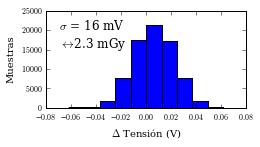

In [41]:
#datos = sp.loadtxt(sorted(glob('../lantz/mediciones/aps/prueba16/*.txt'))[1])
diff = sp.diff(datos[:,1])
diff = diff[diff < 1.] / sp.sqrt(10)
with plt.rc_context(fname='../matplotlib.printrc'):
    plt.hist(diff, bins=sp.unique(diff))
    plt.xlabel('$\Delta$ Tensión (V)')
    plt.ylabel('Muestras')
    plt.text(-.07, 15000, '$\sigma$ = {:.0f} mV\n$\leftrightarrow${:.1f} mGy'.format(1e3*sp.std(diff),
                                                                                    1e3*sp.std(diff)/7.1))
    plt.savefig('figuras/aps/ruido40.pdf')

array([-0.06176324, -0.04941059, -0.03705794, -0.02470529, -0.01235265,
        0.        ,  0.01235265,  0.02470529,  0.03705794,  0.04941059,
        0.06176324])

# Revisión ruido APS

## Comparación entre disparos

In [4]:
import pandas as pd
import numpy as np
#%matplotlib inline
from matplotlib import pyplot as plt
from glob import glob

In [5]:
datos = np.loadtxt(sorted(glob('../lantz/mediciones/aps/prueba16/*.txt'))[1])
df = pd.DataFrame(datos, columns=['t','aps4','aps40'])
df.columns.name = 'size'
df['disparo'] = (df.t.diff() < 0).cumsum()
df = df.set_index(['disparo','t'])

In [6]:
def std_diff(group):
    diff = group.diff()
    diff = diff.loc[diff < 1]
    return diff.std()

std_disparos = df.stack().groupby(['disparo','size']).apply(std_diff) / np.sqrt(10)
for size, group in std_disparos.groupby('size'):
    with plt.rc_context(fname='../../matplotlib.printrc'):
        fig, ax = plt.subplots()
        ax.plot(np.arange(1, len(group)+1), group.values*1000, 'o')
        ax.set(xlabel='Disparo', ylabel='Std (mV)')
        filename = 'figuras/aps/std_disparo_{}.pdf'.format(size)
        print(filename)
        fig.savefig(filename, bbox_inches='tight')
        # figuras/aps/std_disparo_aps4.pdf
        # figuras/aps/std_disparo_aps40.pdf

figuras/aps/std_disparo_aps4.pdf


/home/ignamv/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


figuras/aps/std_disparo_aps40.pdf


In [40]:
std_size = df.stack().groupby(['size']).apply(std_diff)
std_size / np.sqrt(10)

size
aps4     0.016312
aps40    0.014079
dtype: float64

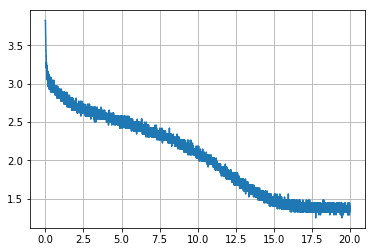

In [45]:
plt.plot(df.loc[0].aps40)